In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Joining Data in SQL'
data = make_dir_line(modality, project)

raw = data('raw')

In [4]:
import sqlite3

conn = sqlite3.connect(":memory:")  ## aca se indica el nombre de la db.
cur = conn.cursor()

# 5.4.0 Subqueries


In [5]:
conn.executescript(
    """
    
DROP TABLE IF EXISTS cities;

CREATE TABLE cities (
    name                  STRING,
    country_code          STRING,
    city_proper_pop       DOUBLE,
    metroarea_pop         DOUBLE,
    urbanarea_pop         DOUBLE
);


DROP TABLE IF EXISTS countries;

CREATE TABLE countries (
  code                  STRING     PRIMARY KEY,
  name                  VARCHAR,
  continent             VARCHAR,
  region                VARCHAR,
  surface_area          REAL,
  indep_year            INTEGER,
  local_name            VARCHAR,
  gov_form              VARCHAR,
  capital               VARCHAR,
  cap_long              REAL,
  cap_lat               REAL
);


DROP TABLE IF EXISTS economies;

CREATE TABLE economies (
  econ_id               INTEGER     PRIMARY KEY,
  code                  STRING,
  year                  INTEGER,
  income_group          VARCHAR,
  gdp_percapita         REAL,
  gross_savings         REAL,
  inflation_rate        REAL,
  total_investment      REAL,
  unemployment_rate     REAL,
  exports               REAL,
  imports               REAL
);


DROP TABLE IF EXISTS languages;

CREATE TABLE languages (
  lang_id               INTEGER     PRIMARY KEY,
  code                  VARCHAR,
  name                  VARCHAR,
  percent               REAL,
  official              BOOLEAN
);


DROP TABLE IF EXISTS populations;

CREATE TABLE populations (
  pop_id                DOUBLE     PRIMARY KEY,
  country_code          VARCHAR,
  year                  DOUBLE,
  fertility_rate        REAL,
  life_expectancy       REAL,
  size                  DOUBLE
);


DROP TABLE IF EXISTS currencies;

CREATE TABLE currencies (
  curr_id               INTEGER     PRIMARY KEY,
  code                  VARCHAR,
  basic_unit            VARCHAR,
  curr_code             VARCHAR,
  frac_unit             VARCHAR,
  frac_perbasic         REAL
);


DROP TABLE IF EXISTS economies2015;

CREATE TABLE economies2015 (
  code                  VARCHAR     PRIMARY KEY,
  year                  INTEGER,
  income_group          VARCHAR,
  gross_savings         REAL
);


DROP TABLE IF EXISTS economies2019;

CREATE TABLE economies2019 (
  code                  VARCHAR     PRIMARY KEY,
  year                  INTEGER,
  income_group          VARCHAR,
  gross_savings         REAL
);


"""
)
conn.commit()

In [6]:
df = pd.read_csv(raw / 'countries/cities.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
cities = list(zip(df.name, df.country_code, df.city_proper_pop, df.metroarea_pop, df.urbanarea_pop))
cur.executemany("INSERT INTO cities VALUES  (?,?,?,?,?)", cities)

In [7]:
df = pd.read_csv(raw / 'countries/countries.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
countries = list(zip(df.code, df.country_name, df.continent, df.region, df.surface_area, df.indep_year, df.local_name, df.gov_form, df.capital, df.cap_long, df.cap_lat))
cur.executemany("INSERT INTO countries VALUES  (?,?,?,?,?,?,?,?,?,?,?)", countries)

In [8]:
df = pd.read_csv(raw / 'countries/economies.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies = list(zip(df.econ_id, df.code, df.year, df.income_group, df.gdp_percapita, df.gross_savings, df.inflation_rate, df.total_investment, df.unemployment_rate, df.exports, df.imports))
cur.executemany("INSERT INTO economies VALUES  (?,?,?,?,?,?,?,?,?,?,?)", economies)

In [9]:
df = pd.read_csv(raw / 'countries/languages.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
languages = list(zip(df.lang_id, df.code, df.name, df.percent, df.official))
cur.executemany("INSERT INTO languages VALUES  (?,?,?,?,?)", languages)

In [10]:
df = pd.read_csv(raw / 'countries/populations.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
populations = list(zip(df.pop_id, df.country_code, df.year, df.fertility_rate, df.life_expectancy, str(df.size)))
cur.executemany("INSERT INTO populations VALUES  (?,?,?,?,?,?)", populations)

In [11]:
df = pd.read_csv(raw / 'countries/currencies.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
currencies = list(zip(df.curr_id, df.code, df.basic_unit, df.curr_code, df.frac_unit, df.frac_perbasic))
cur.executemany("INSERT INTO currencies VALUES  (?,?,?,?,?,?)", currencies)

In [12]:
df = pd.read_csv(raw / 'countries/economies2015.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies2019 = list(zip(df.code, df.year, df.income_group, df.gross_savings))
cur.executemany("INSERT INTO economies2019 VALUES  (?,?,?,?)", economies2019)

In [13]:
df = pd.read_csv(raw / 'countries/economies2019.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies2015 = list(zip(df.code, df.year, df.income_group, df.gross_savings))
cur.executemany("INSERT INTO economies2015 VALUES  (?,?,?,?)", economies2015)

## 5.4.2 Multiple WHERE clauses

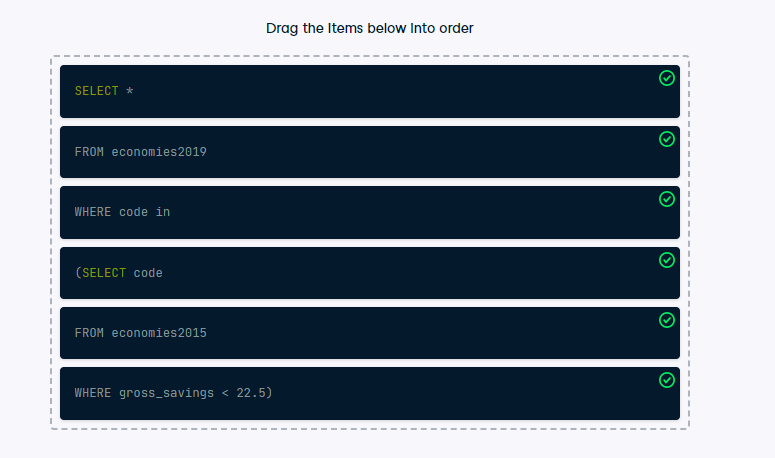

## 5.4.3 Semi join

In [14]:
# -- Select country code for countries in the Middle East
cur.execute("""
            
            SELECT code
            FROM countries
            WHERE region = 'Middle East'
            
            """).fetchall()

[('ARE',),
 ('ARM',),
 ('AZE',),
 ('BHR',),
 ('GEO',),
 ('IRQ',),
 ('ISR',),
 ('YEM',),
 ('JOR',),
 ('KWT',),
 ('CYP',),
 ('LBN',),
 ('OMN',),
 ('QAT',),
 ('SAU',),
 ('SYR',),
 ('TUR',),
 ('PSE',)]

In [15]:
# -- Select unique language names, Order by the name of the language
cur.execute("""
            
            SELECT DISTINCT(name)
            FROM languages
            ORDER BY name;
            
            """).fetchall()

[('Afar',),
 ('Afrikaans',),
 ('Akyem',),
 ('Albanian',),
 ('Alsatian',),
 ('Amerindian',),
 ('Amharic',),
 ('Angolar',),
 ('Antiguan creole',),
 ('Arabic',),
 ('Aramaic',),
 ('Aranese',),
 ('Armenian',),
 ('Asante',),
 ('Ashaninka',),
 ('Asian',),
 ('Assamese',),
 ('Avadhi',),
 ('Aymara',),
 ('Azerbaijani',),
 ('Azeri',),
 ('Bahasa',),
 ('Bahasa Malaysia',),
 ('Bajan',),
 ('Bajjika',),
 ('Balochi',),
 ('Baluchi',),
 ('Bambara',),
 ('Bandjabi',),
 ('Bangla',),
 ('Bapounou/Eschira',),
 ('Basque',),
 ('Belarusian',),
 ('Bembe',),
 ('Bengali',),
 ('Berber',),
 ('Berber or Tamazight',),
 ('Bhojpuri',),
 ('Bisa',),
 ('Bislama',),
 ('Bobo',),
 ('Bokmal',),
 ('Boron',),
 ('Bosnian',),
 ('Brahui',),
 ('Brazilero',),
 ('Breton',),
 ('Bubi',),
 ('Bulgarian',),
 ('Burmese',),
 ('Burushaski',),
 ('Cabo',),
 ('Cantonese',),
 ('Caprivi',),
 ('Caribbean Hindustani',),
 ('Castilian',),
 ('Castilian Spanish',),
 ('Catalan',),
 ('Chamorro',),
 ('Chechen',),
 ('Chewa',),
 ('Chibarwe',),
 ('Chichewa',),
 

In [16]:
# -- Add syntax to use bracketed subquery below as a filter
cur.execute("""
            
            SELECT DISTINCT name
            FROM languages
            WHERE code IN
                (SELECT code
                FROM countries
                WHERE region = 'Middle East')
            ORDER BY name;
            
            """).fetchall()

[('Arabic',),
 ('Aramaic',),
 ('Armenian',),
 ('Azerbaijani',),
 ('Azeri',),
 ('Baluchi',),
 ('Bulgarian',),
 ('Circassian',),
 ('English',),
 ('Farsi',),
 ('Filipino',),
 ('French',),
 ('Georgian',),
 ('Greek',),
 ('Hebrew',),
 ('Hindi',),
 ('Indian',),
 ('Kurdish',),
 ('Other',),
 ('Persian',),
 ('Romanian',),
 ('Russian',),
 ('Syriac',),
 ('Turkish',),
 ('Turkmen',),
 ('Urdu',),
 ('unspecified',)]

## 5.4.4 Diagnosing problems using anti join

In [17]:
# -- Select code and name of countries from Oceania
cur.execute("""
            
            SELECT code, name
            FROM countries
            WHERE continent = 'Oceania';
            
            """).fetchall()

[('ASM', 'American Samoa'),
 ('AUS', 'Australia'),
 ('FJI', 'Fiji Islands'),
 ('GUM', 'Guam'),
 ('KIR', 'Kiribati'),
 ('MHL', 'Marshall Islands'),
 ('FSM', 'Micronesia, Federated States of'),
 ('NRU', 'Nauru'),
 ('PLW', 'Palau'),
 ('PNG', 'Papua New Guinea'),
 ('MNP', 'Northern Mariana Islands'),
 ('PYF', 'French Polynesia'),
 ('SLB', 'Solomon Islands'),
 ('WSM', 'Samoa'),
 ('TON', 'Tonga'),
 ('TUV', 'Tuvalu'),
 ('NCL', 'New Caledonia'),
 ('NZL', 'New Zealand'),
 ('VUT', 'Vanuatu')]

In [18]:
# -- Filter for countries not included in the bracketed subquery
cur.execute("""
            
            SELECT code, name
            FROM countries
            WHERE continent = 'Oceania'
            AND code NOT IN
                (SELECT code
                FROM currencies);
            
            """).fetchall()

[('ASM', 'American Samoa'),
 ('FJI', 'Fiji Islands'),
 ('GUM', 'Guam'),
 ('FSM', 'Micronesia, Federated States of'),
 ('MNP', 'Northern Mariana Islands')]

## 5.4.6 Subquery inside WHERE

In [19]:
# -- Select average life_expectancy from the populations table, Filter for the year 2015
cur.execute("""
            
            SELECT AVG(life_expectancy)
            FROM populations
            WHERE year = 2015
            
            """).fetchall()

[(68.1453780487805,)]

In [20]:
# -- Filter for only those populations where life expectancy is 1.15 times higher than average
cur.execute("""
            
            SELECT *
            FROM populations
            WHERE life_expectancy > 1.15 * 
            (SELECT AVG(life_expectancy)
            FROM populations
            WHERE year = 2015) 
                AND year = 2015;
            
            """).fetchall()

[]

## 5.4.7 WHERE do people live?

In [22]:
# -- Select relevant fields from cities table, Filter using a subquery on the countries table
cur.execute("""
            
            SELECT name, country_code, urbanarea_pop
            FROM cities
            WHERE name IN
                (SELECT capital
                FROM countries)
            ORDER BY urbanarea_pop DESC;
            
            """).fetchall()

[('Beijing', 'CHN', 21516000.0),
 ('Dhaka', 'BGD', 14543124.0),
 ('Tokyo', 'JPN', 13513734.0),
 ('Moscow', 'RUS', 12197596.0),
 ('Cairo', 'EGY', 10230350.0),
 ('Kinshasa', 'COD', 10130000.0),
 ('Jakarta', 'IDN', 10075310.0),
 ('Seoul', 'KOR', 9995784.0),
 ('Mexico City', 'MEX', 8974724.0),
 ('Lima', 'PER', 8852000.0),
 ('London', 'GBR', 8673713.0),
 ('Bangkok', 'THA', 8280925.0),
 ('Tehran', 'IRN', 8154051.0),
 ('Bogota', 'COL', 7878783.0),
 ('Baghdad', 'IRQ', 7180889.0),
 ('Hanoi', 'VNM', 6844100.0),
 ('Santiago', 'CHL', 5743719.0),
 ('Riyadh', 'SAU', 5676621.0),
 ('Singapore', 'SGP', 5535000.0),
 ('Ankara', 'TUR', 5271000.0),
 ('Khartoum', 'SDN', 3639598.0),
 ('Berlin', 'DEU', 3517424.0),
 ('Algiers', 'DZA', 3415811.0),
 ('Kabul', 'AFG', 3414100.0),
 ('Pyongyang', 'PRK', 3255388.0),
 ('Madrid', 'ESP', 3207247.0),
 ('Baku', 'AZE', 3202300.0),
 ('Nairobi', 'KEN', 3138369.0),
 ('Addis Ababa', 'ETH', 3103673.0),
 ('Buenos Aires', 'ARG', 3054300.0),
 ('Kiev', 'UKR', 2908703.0),
 ('Rome', 

## 5.4.8 Subquery inside SELECT

In [23]:
# -- Find top nine countries with the most cities, Order by count of cities as cities_num
cur.execute("""
            
            SELECT countries.name AS country, COUNT(*) AS cities_num
            FROM countries
            LEFT JOIN cities
            ON countries.code = cities.country_code 
            GROUP BY country
            ORDER BY cities_num DESC, country
            LIMIT 9;
            
            """).fetchall()

[('China', 36),
 ('India', 18),
 ('Japan', 11),
 ('Brazil', 10),
 ('Pakistan', 9),
 ('United States', 9),
 ('Indonesia', 7),
 ('Russian Federation', 7),
 ('South Korea', 7)]

## 5.4.9 Subquery inside FROM

In [24]:
# -- Select code, and language count as lang_num
cur.execute("""
            
            SELECT code, COUNT(*) AS lang_num
            FROM languages
            GROUP BY code;
            
            """).fetchall()

[('ABW', 7),
 ('AFG', 4),
 ('AGO', 12),
 ('AIA', 1),
 ('ALB', 4),
 ('AND', 4),
 ('ARE', 5),
 ('ARG', 6),
 ('ARM', 3),
 ('ASM', 5),
 ('ATG', 2),
 ('AUS', 9),
 ('AUT', 5),
 ('AZE', 4),
 ('BDI', 6),
 ('BEL', 3),
 ('BEN', 3),
 ('BFA', 2),
 ('BGD', 2),
 ('BGR', 5),
 ('BHR', 4),
 ('BHS', 2),
 ('BIH', 5),
 ('BLR', 4),
 ('BLZ', 9),
 ('BMU', 2),
 ('BOL', 7),
 ('BRA', 1),
 ('BRB', 2),
 ('BRN', 3),
 ('BTN', 4),
 ('BWA', 9),
 ('CAF', 3),
 ('CAN', 10),
 ('CCK', 2),
 ('CHE', 10),
 ('CHL', 5),
 ('CHN', 9),
 ('CIV', 2),
 ('CMR', 3),
 ('COD', 5),
 ('COG', 3),
 ('COK', 3),
 ('COL', 1),
 ('COM', 3),
 ('CRI', 2),
 ('CUB', 1),
 ('CXR', 3),
 ('CYM', 5),
 ('CYP', 10),
 ('DEU', 1),
 ('DJI', 4),
 ('DMA', 2),
 ('DNK', 4),
 ('DOM', 1),
 ('DZA', 6),
 ('ECU', 4),
 ('EGY', 2),
 ('ERI', 7),
 ('ESH', 3),
 ('ESP', 5),
 ('EST', 5),
 ('ETH', 16),
 ('FIN', 4),
 ('FRA', 13),
 ('FRO', 3),
 ('FSM', 9),
 ('GAB', 6),
 ('GBR', 1),
 ('GEO', 5),
 ('GHA', 11),
 ('GIB', 4),
 ('GIN', 1),
 ('GMB', 5),
 ('GNB', 4),
 ('GNQ', 4),
 ('GR

In [26]:
# -- Select local_name and lang_num from appropriate tables, Where codes match
cur.execute("""
                        
            SELECT local_name, sub.lang_num
            FROM countries,
            (SELECT code, COUNT(*) AS lang_num
            FROM languages
            GROUP BY code) AS sub
            WHERE countries.code = sub.code
            ORDER BY lang_num DESC;
            
            """).fetchall()

[('Zambia', 19),
 ('YeItyop´iya', 16),
 ('Zimbabwe', 16),
 ('Bharat/India', 14),
 ('Nepal', 14),
 ('France', 13),
 ('Mali', 13),
 ('South Africa', 13),
 ('Angola', 12),
 ('Malawi', 12),
 ('Ghana', 11),
 ('Pakistan', 11),
 ('Panama', 11),
 ('Canada', 10),
 ('Schweiz/Suisse/Svizzera/Svizra', 10),
 ('Kypros/Kibris', 10),
 ('Singapore/Singapura/Xinjiapo/Singapur', 10),
 ('Australia', 9),
 ('Belize', 9),
 ('Botswana', 9),
 ('Zhongquo', 9),
 ('Micronesia', 9),
 ('Namibia', 9),
 ('New Zealand/Aotearoa', 9),
 ('Iran', 8),
 ('Mocambique', 8),
 ('Malaysia', 8),
 ('Sao Tome e Principe', 8),
 ('Aruba', 7),
 ('Bolivia', 7),
 ('Ertra', 7),
 ('Magyarorszag', 7),
 ('Al-Maghrib', 7),
 ('Moldova', 7),
 ('Northern Mariana Islands', 7),
 ('Senegal/Sounougal', 7),
 ('Suriya', 7),
 ('Argentina', 6),
 ('Burundi/Uburundi', 6),
 ('Al-Jaza\x92ir/Algerie', 6),
 ('Le Gabon', 6),
 ('Guam', 6),
 ('Makedonija', 6),
 ('Nigeria', 6),
 ('Peru/Piruw', 6),
 ('Belau/Palau', 6),
 ('Rwanda/Urwanda', 6),
 ('Uganda', 6),
 ('A

In [21]:
print('Ok_')

Ok_
